# Binary Classification of The U.S Airline Customers Tweets

**Dataset**: A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").
[Source](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)

In [1]:
import pandas as pd
import os

data = pd.read_csv("tweets.csv")

# Exploratory Data Analysis

## Data Understanding

In [2]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

## Data Preparation

In [5]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [6]:
to_drop = ['tweet_id',   'retweet_count',   'user_timezone',   'tweet_location',   'name',   'negativereason',   'airline_sentiment_confidence',   'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_created']

data.drop(to_drop, inplace=True, axis=1)

In [7]:
data.rename(columns={'airline_sentiment': 'label'}, inplace=True)

In [8]:
# drop rows that have 'neutral'
data = data[data['label'] != 'neutral']

In [9]:
data.loc[data.duplicated()]

,label,text
331,positive,@VirginAmerica Thanks!
515,positive,@united thanks
1477,positive,@united thank you!
1864,positive,@united thank you
1938,positive,@united thank you
...,...,...
13995,negative,@AmericanAir 800 number will not even let you...
14386,negative,@AmericanAir I want to speak to a human being!...
14392,negative,@AmericanAir no response to DM or email yet. ...
14543,negative,@AmericanAir should reconsider #usairways acqu...


In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.sample(10)

,label,text
6629,negative,@SouthwestAir how about when there are Cancell...
10801,negative,"@usairways yep, sent my bag to Philadelphia in..."
3901,negative,@United ticket counter Masters out of SMF not ...
12352,negative,@AmericanAir don't merge with an airline that ...
13820,negative,@AmericanAir next time my flight's Cancelled F...
2538,negative,"@united It isnt simple issue, generally how yo..."
7698,negative,@JetBlue can we get a honest update on departu...
11832,negative,@USAirways still crickets from customer service.
11708,negative,@USAirways won't waive $200 fee due to #neptun...
5382,negative,@SouthwestAir answered. My options are a refun...


In [12]:
# change labels from string to float 
label_map = {'positive': 1.0, 'negative': 0.0}
data['label'] = data['label'].map(label_map)

## Univarite Analysis

In [13]:
data['label'].value_counts()

label
0.0    9087
1.0    2298
Name: count, dtype: int64

<Axes: xlabel='label'>

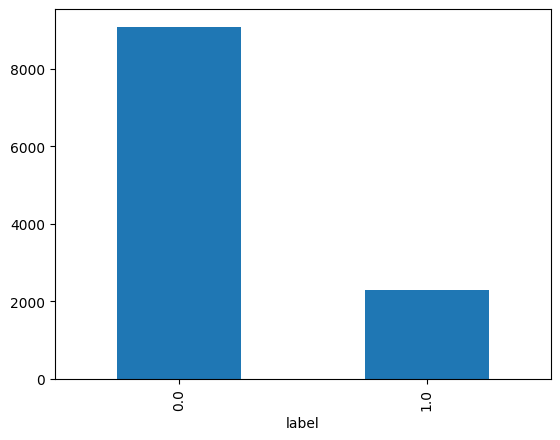

In [14]:
data['label'].value_counts().plot(kind='bar')

### Oversampling

In [15]:
from sklearn.utils import resample
majority = data[(data['label']==0.0)] 
minority = data[(data['label']==1.0)] 

df_minority_upsampled = resample(minority, 
                                 replace=True,
                                 n_samples=data['label'].value_counts()[0], 
                                 random_state=42)
data = pd.concat([df_minority_upsampled, majority])

<Axes: xlabel='label'>

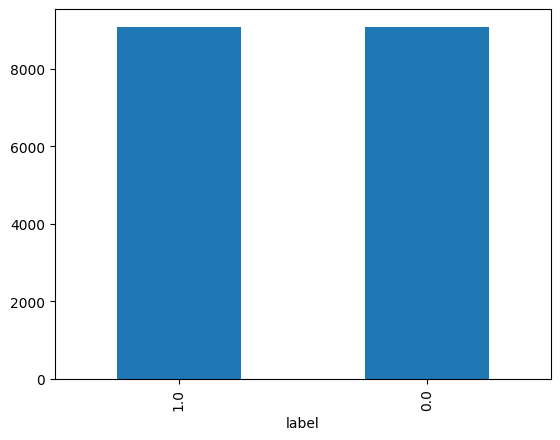

In [16]:
data['label'].value_counts().plot(kind='bar')

# Model Creation

## Clean Text Entries

In [17]:
data['text'][1101]
data['text'][1000]
data['text'][30]
data['text'][10000]
# ===> text contains: links + annotations (user mention)

'@USAirways waiting all day at ATL since flight this am Cancelled Flightled. 1 standby told no seats and group of 15 shows up Late Flight and gets on to PHL'

In [18]:
import re
# Remove User Mention
usernames_regex =re.compile(r'@(?<=@)[^\s]+')
data['text'] = data['text'].str.replace(usernames_regex, '', regex=True)

# Remove Links
links_regex =re.compile(r'http(?<=http)[^\s]+')
data['text'] = data['text'].str.replace(links_regex, '', regex=True)

    
# Remove Punctuations
punc_regex = re.compile(r'[^a-zA-Z0-9\s]')
data['text'] = data['text'].str.replace(punc_regex, '', regex=True)

# Remove Single Characters
single_char_regex = re.compile(r'\s+[a-zA-Z]\s')
data['text'] = data['text'].str.replace(single_char_regex, ' ', regex=True)

# Remove Multiple Space
spaces_regex = re.compile(r'\s{2,}')
data['text'] = data['text'].str.replace(spaces_regex, ' ', regex=True)

In [19]:
data.sample(5)

,label,text
12916,0.0,guess it is more BS AirportCardio given you c...
4648,1.0,Just go ahead and start the scavenger hunt af...
11700,0.0,Ive been on hold for over 90 minutes Theres l...
2756,0.0,already Flight Booking Problems next weeks tr...
14285,1.0,Youre very welcome Dawn We love taking you fl...


In [20]:
# Remove Stop Words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SILICIUM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Lower casing words
data['text'] = data['text'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))

In [22]:
# Stemming Words
from nltk.stem.porter import * 
porter_stemmer = PorterStemmer() 
data['text'] = data['text'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

## Train-Test Split

In [23]:
train_ds = data.sample(frac=0.8, random_state=1)
train = pd.DataFrame(data=train_ds)
test = data.drop(train_ds.index)

## Create the text Encoder

In [24]:
import tensorflow as tf

In [25]:
train = tf.data.Dataset.from_tensor_slices((train['text'], train['label']))
test = tf.data.Dataset.from_tensor_slices((test['text'], test['label']))

In [26]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train = train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test = test.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [27]:
test.element_spec

(TensorSpec(shape=(None,), dtype=tf.string, name=None),
 TensorSpec(shape=(None,), dtype=tf.float64, name=None))

In [28]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train.map(lambda text, airline_sentiment: text))

In [29]:
import numpy as np
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'flight', 'thank', 'get', 'servic', 'help', 'custom',
       'hour', 'time', 'delay', 'cancel', 'great', 'fli', 'wait', 'im',
       'plane', 'call', 'airlin', 'us'], dtype='<U17')

## Create The Model

In [30]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [31]:
train.element_spec

(TensorSpec(shape=(None,), dtype=tf.string, name=None),
 TensorSpec(shape=(None,), dtype=tf.float64, name=None))

In [32]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [33]:
history = model.fit(train, epochs=10,
                    validation_data=test,
                    validation_steps=30)

Epoch 1/10
228/228 [==============================] - 41s 105ms/step - loss: 0.6209 - accuracy: 0.5454 - val_loss: 0.3684 - val_accuracy: 0.9216
Epoch 2/10
228/228 [==============================] - 15s 67ms/step - loss: 0.3167 - accuracy: 0.8741
Epoch 3/10
228/228 [==============================] - 15s 65ms/step - loss: 0.2488 - accuracy: 0.9045
Epoch 4/10
228/228 [==============================] - 15s 65ms/step - loss: 0.2202 - accuracy: 0.9138
Epoch 5/10
228/228 [==============================] - 15s 68ms/step - loss: 0.2035 - accuracy: 0.9205
Epoch 6/10
228/228 [==============================] - 15s 66ms/step - loss: 0.1894 - accuracy: 0.9242
Epoch 7/10
228/228 [==============================] - 15s 66ms/step - loss: 0.1804 - accuracy: 0.9280
Epoch 8/10
228/228 [==============================] - 15s 67ms/step - loss: 0.1739 - accuracy: 0.9328
Epoch 9/10
228/228 [==============================] - 16s 69ms/step - loss: 0.1670 - accuracy: 0.9369
Epoch 10/10
228/228 [==================

In [34]:
test_loss, test_acc = model.evaluate(test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

29/29 [==============================] - 0s 14ms/step - loss: 0.2444 - accuracy: 0.9249
Test Loss: 0.24437013268470764
Test Accuracy: 0.9248775243759155


In [35]:
sample_text = ('nice flight'
               'amazing services')
predictions = model.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 5s 5s/step
[[1.254904]]


In [36]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

(0.0, 0.6438212491571903)

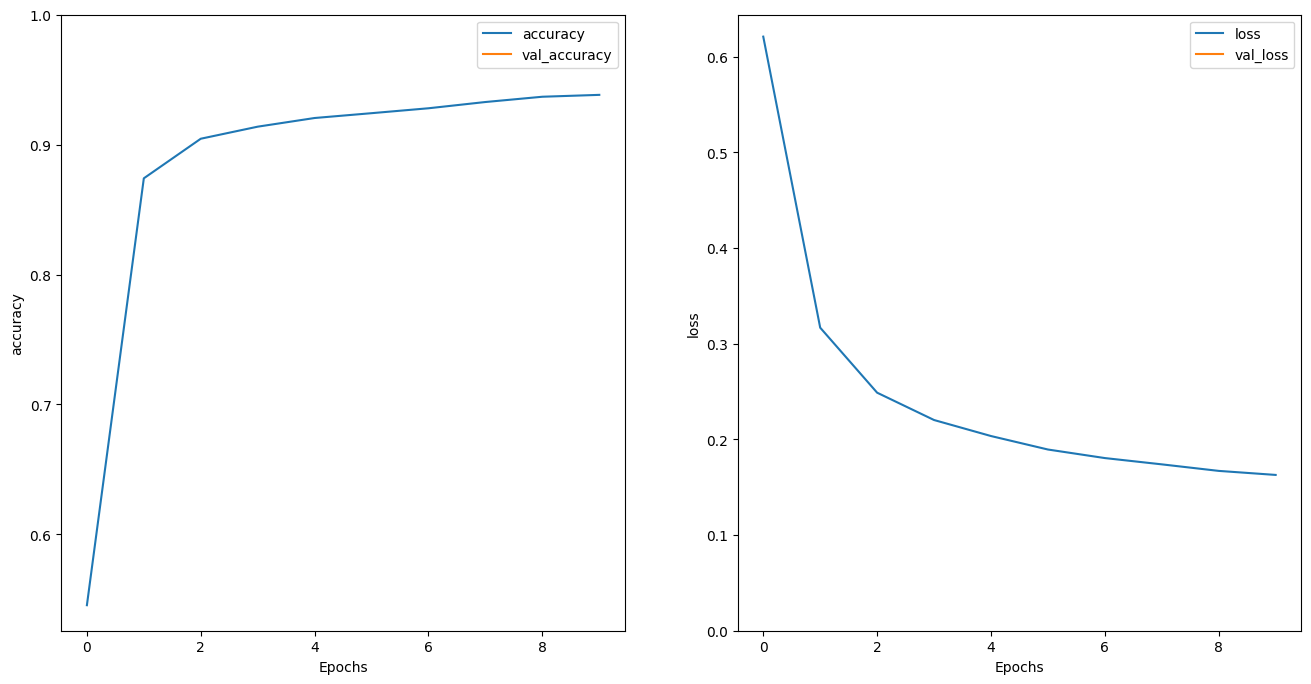

In [37]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)